<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Подгружаем-библиотеки,-которые-будем-использовать-далее." data-toc-modified-id="Подгружаем-библиотеки,-которые-будем-использовать-далее.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Подгружаем библиотеки, которые будем использовать далее.</a></span></li><li><span><a href="#Открываем-файлы-и-изучаем-их." data-toc-modified-id="Открываем-файлы-и-изучаем-их.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Открываем файлы и изучаем их.</a></span></li><li><span><a href="#Проверим,-что-эффективность-обогащения-рассчитана-правильно.-Вычислим-её-на-обучающей-выборке-для-признака-rougher.output.recovery.-Найдем-MAE-между-нашими-расчётами-и-значением-признака.-Опишем-выводы." data-toc-modified-id="Проверим,-что-эффективность-обогащения-рассчитана-правильно.-Вычислим-её-на-обучающей-выборке-для-признака-rougher.output.recovery.-Найдем-MAE-между-нашими-расчётами-и-значением-признака.-Опишем-выводы.-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery. Найдем MAE между нашими расчётами и значением признака. Опишем выводы.</a></span></li><li><span><a href="#Проведем-предобработку-данных.-Проанализируем-признаки,-недоступные-в-тестовой-выборке.-Что-это-за-параметры?-К-какому-типу-относятся?-Формулировка-взята-из-условия." data-toc-modified-id="Проведем-предобработку-данных.-Проанализируем-признаки,-недоступные-в-тестовой-выборке.-Что-это-за-параметры?-К-какому-типу-относятся?-Формулировка-взята-из-условия.-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span><font color="green">Проведем предобработку данных. Проанализируем признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся? Формулировка взята из условия.</font></a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Напишем-функцию-для-вычисления-sMAPE" data-toc-modified-id="Напишем-функцию-для-вычисления-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Напишем функцию для вычисления sMAPE</a></span></li><li><span><a href="#Далее-обучим-модели-3-видов-и-оценим-их-качество-с-помощью-кросс-валидации,-где-в-качестве-метрики-качества-будет-final_smape" data-toc-modified-id="Далее-обучим-модели-3-видов-и-оценим-их-качество-с-помощью-кросс-валидации,-где-в-качестве-метрики-качества-будет-final_smape-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Далее обучим модели 3 видов и оценим их качество с помощью кросс-валидации, где в качестве метрики качества будет final_smape</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

### Подгружаем библиотеки, которые будем использовать далее.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, LassoCV
from numpy.random import RandomState
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler


### Открываем файлы и изучаем их.

In [2]:
data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')


In [3]:
display(data_train.head())

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
print(data_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [5]:
data_train.shape

(14149, 87)

In [6]:
display(data_test.head())

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [7]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [8]:
data_test.shape

(5290, 53)

In [9]:
display(data_test.head())

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [10]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [11]:
data_full.shape

(19439, 87)

<font color='green'>После первичного изучения данных видно, что количество столбцов в полной и тренировочных выборках совпадает, при этом в тестовой их на 34 меньше. Также видно, что все столбцы, кроме даты имеют тип float64. Дату приведем к формату datetime позже. Кроме того, видно, что во многих столбцах есть разное количество пропусков. Более подробно ознакомимся с ними позже и постараемся их устранить.</font>

<font color='green'>Проверим данные на полные дубликаты</font>

In [12]:
print(data_train.duplicated().sum())
print(data_full.duplicated().sum())
print(data_test.duplicated().sum())

0
0
0


<font color='green'>Полные дубликаты отсутсвуют</font>

Зафиксируем псевдослучайную последовательность.

In [13]:
STATE = 12345

### Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery. Найдем MAE между нашими расчётами и значением признака. Опишем выводы.

<font color='green'>Данная формулировка полностью взята из задания</font>

<font color='green'>Формула расчета взята из условия recovery = ((c*(f-t))/(f*(c-t))) * 100. 
1. C — доля золота в концентрате после флотации/очистки;
2. F — доля золота в сырье/концентрате до флотации/очистки;
3. T — доля золота в отвальных хвостах после флотации/очистки. 

    Очевидно, нам нужны данные из этапа флотации - rougher.</font>

In [14]:
c = data_train['rougher.output.concentrate_au']
f = data_train['rougher.input.feed_au']
t = data_train['rougher.output.tail_au']
recovery = ((c*(f-t))/(f*(c-t))) * 100
print(recovery.head())
print(data_train['rougher.output.recovery'].head())

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
dtype: float64
0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
Name: rougher.output.recovery, dtype: float64


<font color='green'>Видно, что получившиеся данные визуально совпадают. Найдем MAE -  метрику, которая сообщает нам среднюю абсолютную разницу между прогнозируемыми значениями и фактическими значениями в наборе данных. Чем ниже MAE, тем лучше модель соответствует набору данных. Сравним данные в столбце rougher.output.recovery и получившимся recovery</font>

In [15]:
print(mean_absolute_error(data_train['rougher.output.recovery'], recovery))

9.73512347450521e-15


Полученное значение очень мало, что говорит о верности расчета.
<font color='green'>Ведь, как написано выше, МАЕ тем лучше - чем меньше, а полученное число примерно равно 0.000000000000009735..., что можно принять за погрешность. Таким образом, rougher.output.recovery рассчитан правильно</font>


### <font color='green'>Проведем предобработку данных. Проанализируем признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся? Формулировка взята из условия.</font>

In [16]:
data_add_cols = data_train.columns.difference(data_test.columns)
data_add_cols.to_list()

['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

 <font color='green'>Также рассмотрим другой способ поиска отстуствующих признаков, для разнообразия, наверное</font>

In [17]:
data_del = []
for a in list(data_train.columns):
    if a not in (list(data_test.columns)):
        data_del.append(a)
print(data_del, len(data_del))

['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.concentrate_au', 'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb', 'final.output.tail_sol', 'final.output.tail_au', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au', 'rougher.calculation.sulfate_to_au_concentrate', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.concentrate_au', 'rougher.output.recovery', 'rougher.output.tail_ag', 'rougher.output.tail_pb', 'rougher.output.tail_sol', 'rougher.output.tai

 <font color='green'>Видно, что их 34. 2 из них - 'final.output.recovery' и 'rougher.output.recovery' - целевые признаки по условию, их добавим в тестовый датасет позже. Остальные отсуствующие признаки вероятно связаны с разными составами и параметрами получающихся на разных этапах продуктов. Скорее всего, они отсутствуют из-за получения в процессе эксперимента</font>

 <font color='green'>Приведем колонки с датой к формату datetime и проверим, ессть ли повторяющиеся даты. Предположим, что каждый эксперимент можно идентифицировать по дате и даты не повторяются. Тогда Можно будет использовать дату как идентификатор для добавления в тестовую выборку необходимых соответсвующих целевых признаков из полного датафрейма</font>

In [18]:
data_train['date'] = pd.to_datetime(data_train['date'], format='%Y-%m-%dT%H:%M:%S')
data_test['date'] = pd.to_datetime(data_test['date'], format='%Y-%m-%dT%H:%M:%S')
data_full['date'] = pd.to_datetime(data_full['date'], format='%Y-%m-%dT%H:%M:%S')
print(data_full['date'].duplicated().sum())

0


Дубликаты не обнаружены, все даты неповторимы.

<font color='green'></font>
Добавим целевые столбцы в тестовую выборку, возьмем их из полного датафрейма, по соответсвующим датам.

In [19]:
data_test = data_test.merge(data_full[['date', 'rougher.output.recovery', 'final.output.recovery']], on='date', how='left')
print(data_test.shape)
display(data_test.head())

(5290, 55)


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,89.993421,70.273583
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,88.089657,68.910432
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,88.412756,68.143213
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987,87.360133,67.776393
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333,83.236367,61.467078


Удалим столбы с датами, они не понадобятся для обучения, а наоборот будут только мешать.  

In [20]:
data_train = data_train.drop('date', axis=1)
data_test = data_test.drop('date', axis=1)
data_train.info()
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                                14149 non-null  float64


Проверим датафреймы на полные дубликаты и пропуски. Запоолним пропуски методом ffill, который заполняет пропуски предыдущим значением соответсвующего признака.  

In [21]:
print(data_train.isna().sum().sort_values(ascending=False).head(10))
print(data_test.isna().sum().sort_values(ascending=False).head(10))
print(data_full.isna().sum().sort_values(ascending=False).head(10))
print('')
data_train = data_train.ffill(axis=0)
data_test = data_test.ffill(axis=0)
data_full = data_full.ffill(axis=0)
print('')
print(data_train.isna().sum().sum())
print(data_test.isna().sum().sum())
print(data_full.isna().sum().sum())

secondary_cleaner.output.tail_sol           1605
rougher.state.floatbank10_e_air              436
rougher.input.floatbank11_xanthate           428
primary_cleaner.output.concentrate_sol       286
secondary_cleaner.state.floatbank2_a_air     217
final.output.concentrate_sol                 211
rougher.input.feed_size                      144
rougher.input.feed_pb                        100
final.output.tail_pb                         100
primary_cleaner.input.xanthate               100
dtype: int64
rougher.input.floatbank11_xanthate          25
rougher.input.feed_sol                      21
secondary_cleaner.state.floatbank3_a_air     9
rougher.input.floatbank11_sulfate            8
primary_cleaner.input.depressant             5
rougher.input.floatbank10_sulfate            5
primary_cleaner.input.sulfate                4
primary_cleaner.input.xanthate               4
rougher.input.feed_rate                      3
secondary_cleaner.state.floatbank2_a_air     3
dtype: int64
secondary_clea

## Анализ данных

Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Построим соответсвующие гистограммы.

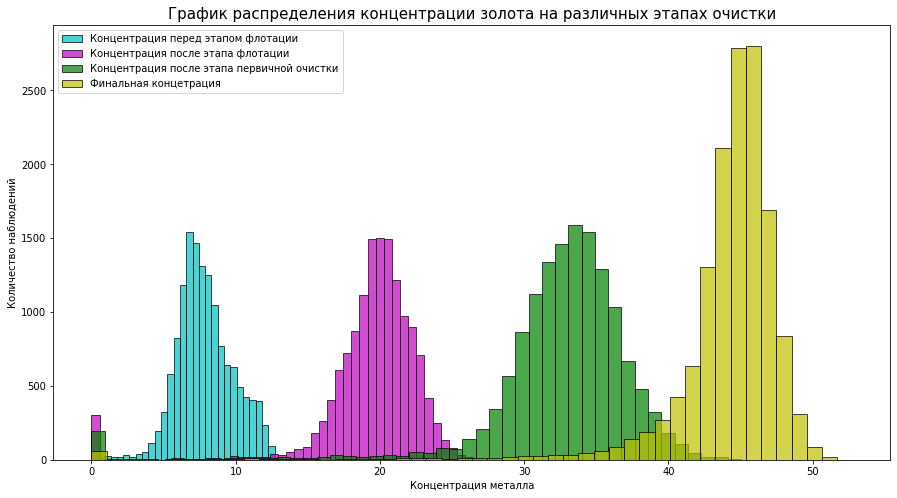

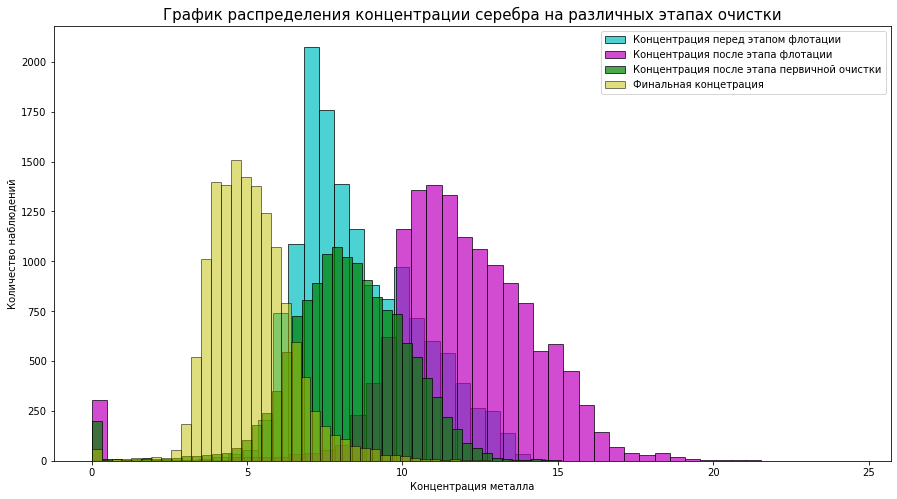

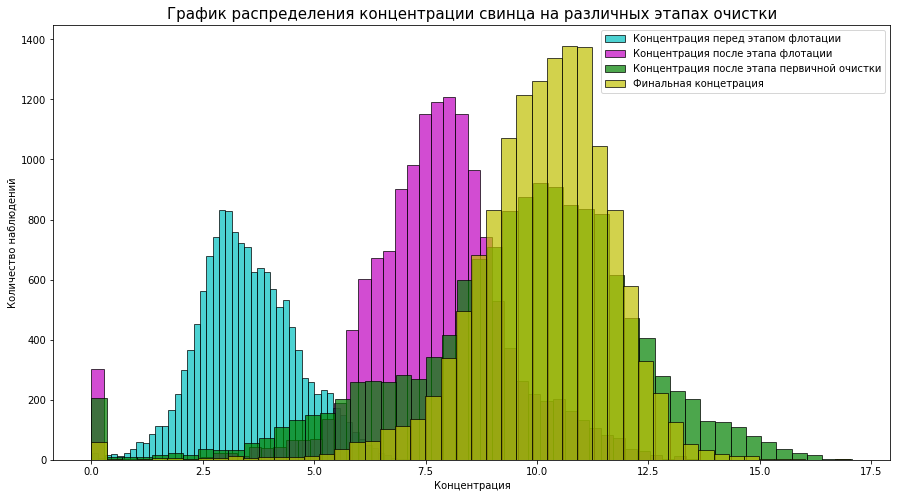

In [22]:
plt.figure(figsize=[15, 8])
plt.title('График распределения концентрации золота на различных этапах очистки', fontsize=15)
plt.hist(data_train['rougher.input.feed_au'], bins=30, color = 'c', alpha = 0.7,\
         label='Концентрация перед этапом флотации', ec='black')
plt.hist(data_train['rougher.output.concentrate_au'], bins=50, color = 'm', alpha = 0.7,\
         label='Концентрация после этапа флотации', ec='black')
plt.hist(data_train['primary_cleaner.output.concentrate_au'], bins=50, color = 'g', alpha = 0.7,\
         label='Концентрация после этапа первичной очистки', ec='black')
plt.hist(data_train['final.output.concentrate_au'], bins=50, color = 'y', alpha = 0.7,\
         label='Финальная концетрация', ec='black')
plt.xlabel('Концентрация металла')
plt.ylabel('Количество наблюдений')
plt.legend()
plt.show()
plt.figure(figsize=[15, 8])
plt.title('График распределения концентрации серебра на различных этапах очистки', fontsize=15)
plt.hist(data_train['rougher.input.feed_ag'], bins=30, color = 'c', alpha = 0.7,\
         label='Концентрация перед этапом флотации', ec='black')
plt.hist(data_train['rougher.output.concentrate_ag'], bins=50, color = 'm', alpha = 0.7\
         , label='Концентрация после этапа флотации', ec='black')
plt.hist(data_train['primary_cleaner.output.concentrate_ag'], bins=50, color = 'g', alpha = 0.7\
         , label='Концентрация после этапа первичной очистки', ec='black')
plt.hist(data_train['final.output.concentrate_ag'], bins=50, color = 'y', alpha = 0.5\
         , label='Финальная концетрация', ec='black')
plt.xlabel('Концентрация металла')
plt.ylabel('Количество наблюдений')
plt.legend()
plt.show()
plt.figure(figsize=[15, 8])
plt.title('График распределения концентрации свинца на различных этапах очистки', fontsize=15)
plt.hist(data_train['rougher.input.feed_pb'], bins=50, color = 'c', alpha = 0.7,\
         label='Концентрация перед этапом флотации', ec='black')
plt.hist(data_train['rougher.output.concentrate_pb'], bins=50, color = 'm', alpha = 0.7,\
         label='Концентрация после этапа флотации', ec='black')
plt.hist(data_train['primary_cleaner.output.concentrate_pb'], bins=50, color = 'g', alpha = 0.7,\
         label='Концентрация после этапа первичной очистки', ec='black')
plt.hist(data_train['final.output.concentrate_pb'], bins=50, color = 'y', alpha = 0.7,\
         label='Финальная концетрация', ec='black')
plt.xlabel('Концентрация')
plt.ylabel('Количество наблюдений')
plt.legend()
plt.show()

1. Концентрация золота растет с каждым этапом, что логично, учитывая, что смысл процесса в получении чистого золота.
2. Концентрация серебра увеличивается после флотации, но затем последовательно снижается.
3. Концентрация свинца последовательно увеличивается, практически не изменяясь после первой очистки.

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках.  

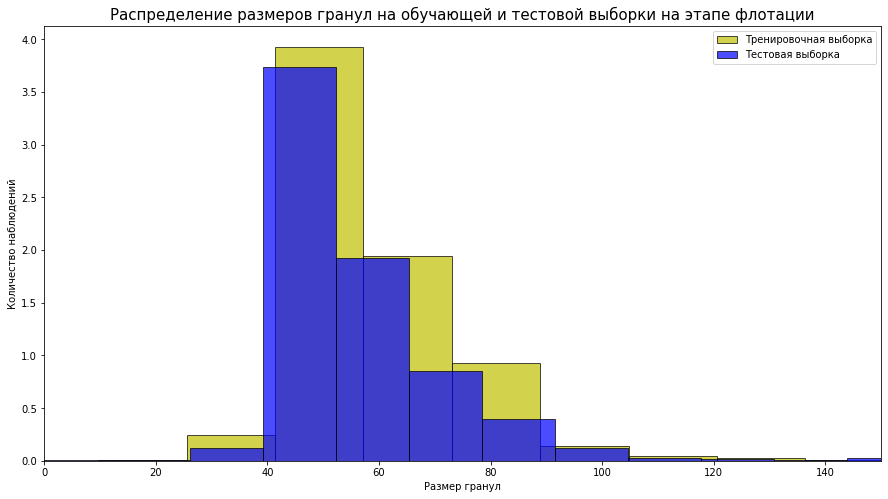

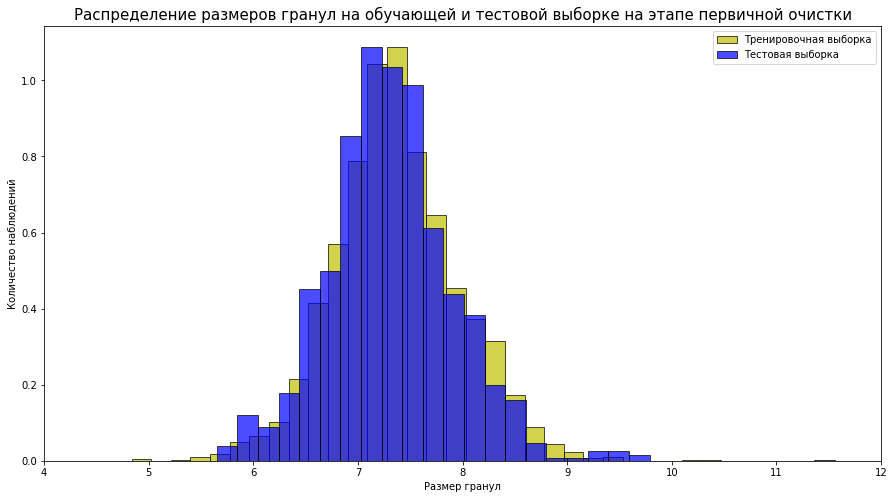

In [23]:
plt.figure(figsize=[15, 8])
plt.title('Распределение размеров гранул на обучающей и тестовой выборки на этапе флотации', fontsize=15)
plt.hist(data_train['rougher.input.feed_size'], bins=30, color = 'y', alpha = 0.7,\
         label='Тренировочная выборка', ec='black',\
         weights=data_train['primary_cleaner.input.feed_size']/len(data_train['primary_cleaner.input.feed_size']))
plt.hist(data_test['rougher.input.feed_size'], bins=30, color = 'b', alpha = 0.7,\
         label='Тестовая выборка', ec='black',\
         weights=data_test['primary_cleaner.input.feed_size']/len(data_test['primary_cleaner.input.feed_size']))

plt.xlabel('Размер гранул')
plt.ylabel('Количество наблюдений')
plt.legend()
plt.xlim([0, 150])
plt.show()

plt.figure(figsize=[15, 8])
plt.title('Распределение размеров гранул на обучающей и тестовой выборке на этапе первичной очистки', fontsize=15)
plt.hist(data_train['primary_cleaner.input.feed_size'], bins=50, color = 'y', alpha = 0.7,\
         label='Тренировочная выборка', ec='black',\
         weights=data_train['primary_cleaner.input.feed_size']/len(data_train['primary_cleaner.input.feed_size']))
plt.hist(data_test['primary_cleaner.input.feed_size'], bins=50, color = 'b', alpha = 0.7,\
         label='Тестовая выборка', ec='black',\
         weights=data_test['primary_cleaner.input.feed_size']/len(data_test['primary_cleaner.input.feed_size']))

plt.xlabel('Размер гранул')
plt.ylabel('Количество наблюдений')
plt.legend()
plt.xlim([4, 12])
plt.show()

Видно, что распределение размеров гранул имеет похожую структуру. 

Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. 

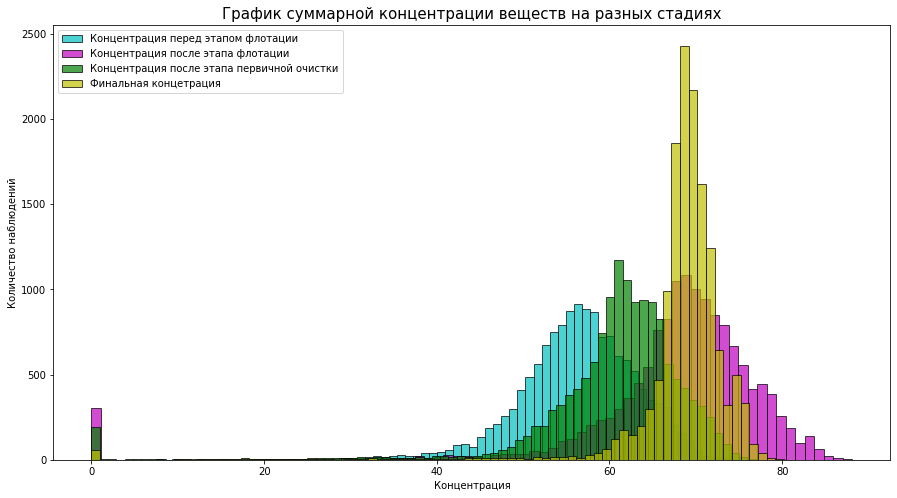

In [24]:
concentrate_of_rougher_input = data_train['rougher.input.feed_ag'] + data_train['rougher.input.feed_au']\
+ data_train['rougher.input.feed_pb'] + data_train['rougher.input.feed_sol']
concentrate_of_rougher_output = data_train['rougher.output.concentrate_ag']\
+ data_train['rougher.output.concentrate_au'] + data_train['rougher.output.concentrate_pb']\
+ data_train['rougher.output.concentrate_sol']
concentrate_of_primary_cleaner_output = data_train['primary_cleaner.output.concentrate_ag']\
+ data_train['primary_cleaner.output.concentrate_au'] + data_train['primary_cleaner.output.concentrate_pb']\
+ data_train['primary_cleaner.output.concentrate_sol']
concentrate_of_final_output = data_train['final.output.concentrate_ag'] + data_train['final.output.concentrate_au']\
+ data_train['final.output.concentrate_pb'] + data_train['final.output.concentrate_sol']

plt.figure(figsize=[15, 8])
plt.title('График суммарной концентрации веществ на разных стадиях', fontsize=15)
plt.hist(concentrate_of_rougher_input, bins=80, color = 'c', alpha = 0.7\
         , label='Концентрация перед этапом флотации', ec='black')
plt.hist(concentrate_of_rougher_output, bins=80, color = 'm', alpha = 0.7\
         , label='Концентрация после этапа флотации', ec='black')
plt.hist(concentrate_of_primary_cleaner_output, bins=80, color = 'g', alpha = 0.7\
         , label='Концентрация после этапа первичной очистки', ec='black')
plt.hist(concentrate_of_final_output, bins=80, color = 'y', alpha = 0.7\
         , label='Финальная концетрация', ec='black')
plt.xlabel('Концентрация')
plt.ylabel('Количество наблюдений')
plt.legend()
plt.show()

<font color='green'>Сделал</font>

Видно, что суммарная концентрация веществ растет после флотации, затем немного снижается после первичной очистки, и далее растет после финальной очистки, при этом распределение финальной концентрации находится в наименьшем диапазоне. 

Кроме того, выявлено довольно много нулевых значений, которые следует удалить, чтобы исключить негативное влияние на качество обучения моделей. 

In [25]:
data_train = data_train[(data_train['rougher.input.feed_au'] != 0)\
                        & (data_train['rougher.input.feed_ag'] != 0)\
                        & (data_train['rougher.input.feed_pb'] != 0)\
                        & (data_train['rougher.input.feed_sol'] != 0)]
data_train = data_train[(data_train['rougher.output.concentrate_au'] != 0)\
                        & (data_train['rougher.output.concentrate_ag'] != 0)\
                        & (data_train['rougher.output.concentrate_pb'] != 0)\
                        & (data_train['rougher.output.concentrate_sol'] != 0)]
data_train = data_train[(data_train['primary_cleaner.output.concentrate_au'] != 0)\
                        & (data_train['primary_cleaner.output.concentrate_au'] != 0)\
                        & (data_train['primary_cleaner.output.concentrate_pb'] != 0)\
                        & (data_train['primary_cleaner.output.concentrate_sol'] != 0)]
data_train = data_train[(data_train['final.output.concentrate_au'] != 0) &\
                        (data_train['final.output.concentrate_ag'] != 0) &\
                        (data_train['final.output.concentrate_pb'] != 0) &\
                        (data_train['final.output.concentrate_sol'] != 0)]

print(data_train.shape)

(13716, 86)


In [26]:
print((1-len(data_train)/14149)*100)

3.0602869460739313


После удаления, количетсво строк уменьшилось с 14149 до 13716, то есть снижение составило около 3%, что допустимо и не критично. <font color='green'>Добавил расчет процента удаленных значений</font>

## Модель

### Напишем функцию для вычисления sMAPE

<font color='green'>Формула указана в условии.</font>

In [27]:
def smape(target, predict):
    smape = (1/len(target))*sum((abs(target - predict))/((abs(target)+abs(predict))/2))*100
    return smape

<font color='green'>создадим метрику на основе функции sMAPE для использования оценки качества в кросс-валидации.</font>

In [28]:
smape_scorer = make_scorer(smape, greater_is_better = False)

<font color='green'>Далее будет модель GridSearchCV</font>

Напишем функцию для вычисления итогового sMAPE
<font color='green'>Формула указана в условии.</font>

In [29]:
def final_smape(rougher, final):
    final_smape = 0.25*rougher+0.75*final
    return final_smape

Удалим из тренировочной выборки признаки, которых нет в тестовой выборке для повышения качества обучения модели.<font color='green'>Применил другой способ удаления лишних признаков</font>

In [30]:
for_remove = ['final.output.recovery','rougher.output.recovery']
for i in for_remove: 
    data_del.remove(i)

data_train.drop(data_del, axis=1, inplace=True)
print(data_train.shape)
print(data_train.columns)

(13716, 54)
Index(['final.output.recovery', 'primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.output.recovery',
       'rougher.state.floatban

Разделим тренировочную выборку на выборку с признаками и 2 целевых признака. 

In [31]:
features_train = data_train.drop(['rougher.output.recovery','final.output.recovery'], axis=1)
target_rougher_train = data_train['rougher.output.recovery']
target_final_train = data_train['final.output.recovery']

### Далее обучим модели 3 видов и оценим их качество с помощью кросс-валидации, где в качестве метрики качества будет final_smape


Первой протестируем модель линейной регрессии.

In [32]:
%%time
model_lr_rougher = LinearRegression()
smape_rougher = cross_val_score(model_lr_rougher, features_train, target_rougher_train, scoring=smape_scorer,cv=5)
final_smape_rougher = smape_rougher.mean()
model_lr_final = LinearRegression()
smape_final = cross_val_score(model_lr_final, features_train, target_final_train, scoring=smape_scorer, cv=5)
final_smape_final = smape_final.mean()
result_smape_lr = final_smape(final_smape_rougher, final_smape_final)*(-1)
print(result_smape_lr)

10.02312452485542
CPU times: user 883 ms, sys: 2.07 s, total: 2.95 s
Wall time: 2.92 s


Получили очень быстрое вычисление и оценку качества около 10.02

Далее протестируем модель дерева решений с перебором гиперпараметра глубины.


In [33]:
%%time
result_dt_rougher = 100
param_dt_rougher = 0
for n in range(1, 10, 1):
    model_dt_rougher = DecisionTreeRegressor(max_depth=n, random_state=STATE)
    smape_rougher = cross_val_score(model_dt_rougher, features_train, target_rougher_train, scoring=smape_scorer, cv=5, n_jobs=-1)
    final_smape_rougher = abs(smape_rougher.mean())   
    if final_smape_rougher < result_dt_rougher:
        result_dt_rougher = final_smape_rougher
        param_dt_rougher = n
result_dt_final = 100
param_dt_final = 0
for n in range(1, 10, 1):
    model_dt_final = DecisionTreeRegressor(max_depth=n, random_state=STATE)
    smape_final = cross_val_score(model_dt_rougher, features_train, target_final_train, scoring=smape_scorer, cv=5, n_jobs=-1)
    final_smape_final = abs(smape_final.mean())   
    if final_smape_final < result_dt_final:
        result_dt_final = final_smape_final
        param_dt_final = n
result_smape = final_smape(result_dt_rougher, result_dt_final)
print(result_smape, param_dt_rougher, param_dt_final)

10.274427578573517 4 1
CPU times: user 32.5 s, sys: 203 ms, total: 32.7 s
Wall time: 32.8 s


Получили значительно лучший результат, около 8.89, при этом выросло и время вычисления с 3 секунд до 24. Лучший результат при глубине 3, запомним это значение. <font color='green'>С 2 разными циклами результат получился значительно хуже - 10.27, даже хуже, чем с линейной регрессией. Посмотрим, что покажут другие модели</font>

Далее протестируем модель случайного леса с перебором гиперпараметров количества деревьев и глубины. <font color='green'>Здесь также попробуем заменить 1 цикл на два. </font>

In [34]:
%%time
result_rf_rougher = 100
params_rf_rougher = []
for n in range(10, 30, 10):
    for i in range(2,5,1):
        model_rf_rougher = RandomForestRegressor(n_estimators=n, max_depth=i, random_state=STATE)
        smape_rougher = cross_val_score(model_rf_rougher, features_train, target_rougher_train, scoring=smape_scorer, cv=5, n_jobs=-1)
        final_smape_rougher = abs(smape_rougher.mean())   
        if final_smape_rougher < result_rf_rougher:
            result_rf_rougher = final_smape_rougher
            params_rf_rougher = [n,i]
result_rf_final = 100
params_rf_final = []
for n in range(10, 30, 10):
    for i in range(2,5,1):
        model_rf_final = RandomForestRegressor(n_estimators=n, max_depth=i, random_state=STATE)
        smape_final = cross_val_score(model_rf_final, features_train, target_final_train, scoring=smape_scorer, cv=5, n_jobs=-1)
        final_smape_final = abs(smape_final.mean())
        if final_smape_final < result_rf_final:
            result_rf_final = final_smape_final
            params_rf_final = [n,i]
result_smape = final_smape(result_rf_rougher, result_rf_final)
print(result_smape, params_rf_rougher, params_rf_final)

8.438600925664765 [10, 4] [10, 4]
CPU times: user 1min 33s, sys: 227 ms, total: 1min 33s
Wall time: 1min 33s


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>👍</font>

Получили еще более низкое (а значит лучшее) значение оценки, около 8.44. Время увеличилось до 1,5 минут. Гиперпараметры для лучшего результата - количество деревьев - 10, максимальная глубина - 4. <font color='green'>Здесь результат остался таким же, если не объединять обучение обеих моелей в 1 цикл. Здесь лучшее значение метрики,  параметры для обучения модели с разными целевыми признаками одинаковые - количество деревьев 10, глубина - 4,</font>

<font color='green'>Протестируем модель Lasso. Решил добавить, а вдруг, учитывая мультиколлинеарность, должна быть лучше обычной модели линейной регрессии?</font>

In [35]:
%%time
scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
param = {
     'n_alphas': range(1, 100, 20)
    }
model = LassoCV(random_state=STATE)
search = GridSearchCV(model, param, scoring=smape_scorer, n_jobs=-1, cv=5)
result = search.fit(features_train, target_rougher_train)
print(result.best_score_, result.best_params_)
final_smape_rougher = result.best_score_
result = search.fit(features_train, target_final_train)
print(result.best_score_, result.best_params_)
final_smape_final = result.best_score_
result_smape_l = final_smape(final_smape_rougher, final_smape_final)*(-1)
print(result_smape_l)


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87.9934107864392, tolerance: 36.13972374231923
  model = cd_fast.enet_coordinate_descent_gram(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1444.1030639429518, tolerance: 45.919876975164975
  model = cd_fast.enet_coordinate_descent_gram(


-6.615347644700881 {'n_alphas': 21}


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 141.91347772191511, tolerance: 78.32150972237928
  model = cd_fast.enet_coordinate_descent_gram(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 654.0032556940569, tolerance: 77.30124174260406
  model = cd_fast.enet_coordinate_descent_gram(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 279.2331231936114, tolerance: 75.89444830991579
  model = cd_fast.enet_coordinate_descent_gram(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarnin

-9.403810069791124 {'n_alphas': 61}
8.706694463518563
CPU times: user 32.4 s, sys: 1min 4s, total: 1min 37s
Wall time: 1min 37s


<font color='green'>Получили результат 8.71, что немного хуже, чем результат случайного леса.
Таким образом, лучшие результаты у модели случайного леса</font>

Применим модель случайного леса с полученными параметрами для тестовой выборки.

In [36]:
features_test = data_test.drop(['rougher.output.recovery','final.output.recovery'], axis=1)
target_rougher_test = data_test['rougher.output.recovery']
target_final_test = data_test['final.output.recovery']

In [ ]:
%%time
model_test_rougher = RandomForestRegressor(n_estimators=10, max_depth=4)
model_test_rougher.fit(features_train, target_rougher_train)
predict_rougher = model_test_rougher.predict(features_test)
model_test_final = RandomForestRegressor(n_estimators=10, max_depth=4)
model_test_final.fit(features_train, target_final_train)
predict_final = model_test_final.predict(features_test)
smape_rougher_test = smape(target_rougher_test, predict_rougher)
smape_final_test = smape(target_final_test, predict_final)
final_smape_test = final_smape(smape_rougher_test, smape_final_test)
print(final_smape_test)

Получили результат около 9.27 на тестовой выборке. Теперь проверим модель на адекватность, испольуя константную модель DummyRegressor.

In [38]:
model = DummyRegressor(strategy="mean")
model.fit(features_train, target_rougher_train)
predicted_rougher = model.predict(features_test)
smape_rougher = smape(target_rougher_test, predicted_rougher)

model.fit(features_train, target_final_train)
predicted_final = model.predict(features_test)
smape_final = smape(target_final_test, predicted_final)

dummy_final = final_smape(smape_rougher, smape_final)
print(dummy_final)

9.82761382259758


Модель прошла проверку на адекватность, так как константная модель дала результат 9.82, в то время как

### Вывод

1. Мы изучили и подготовили данные.
2. Проанализировали данные.
3. Построили различные модели прогнозирования. Лучше всего себя показала модель случайного леса, которая также прошла тест на адекватность.

## Чек-лист готовности проекта

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке выполнения
- [x]  Выполнен шаг 1: данные подготовлены
    - [x]  Проверена формула вычисления эффективности обогащения
    - [x]  Проанализированы признаки, недоступные в тестовой выборке
    - [x]  Проведена предобработка данных
- [x]  Выполнен шаг 2: данные проанализированы
    - [x]  Исследовано изменение концентрации элементов на каждом этапе
    - [x]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [x]  Исследованы суммарные концентрации
- [x]  Выполнен шаг 3: построена модель прогнозирования
    - [x]  Написана функция для вычисления итогового *sMAPE*
    - [x]  Обучено и проверено несколько моделей
    - [x]  Выбрана лучшая модель, её качество проверено на тестовой выборке